#서포트벡터머신 -이진분류
- diabates dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1.데이터 준비

-1코랩같은 리뉵스?는 이렇게
-!wget 읽어오는 방법
-2윈도우일때 쓰는 방법
-!pip instrall gdown
-!gdown('파일이름')

In [2]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

--2023-11-23 12:43:08--  https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2023-11-23 12:43:09 (11.0 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [3]:
# 데이터 로딩
diabetes = pd.read_csv('diabetes.csv')
print(type(diabetes))
diabetes.shape

<class 'pandas.core.frame.DataFrame'>


(768, 9)

In [4]:
df= diabetes
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##2.데이터 탐색

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#####결측치

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#####이상치 처리
- 0이 나올  수 없는 데이터 중 0인 데이터를 처리





In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
cols=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols].replace(0, np.nan)           # df에 위 5개 열 에서 0인 값을 nan으로 대체 한다

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [10]:
df[cols]        # 하지만 원본은 그대로 . 그래서 뒤에 inplace를 달아줌

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [11]:
df[cols] = df[cols].replace(0, np.nan)  #df[cols].replace(0, np.nan,inplace=True)

In [12]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# 결측치에 각 컬럼의 평균값을 채우는 처리

df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)

In [14]:
# cols=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# for col in cols:
#   df[col].fillna(df[col].mean(), inplace=True)               #위랑 같은 방법

In [15]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##3.테스트 데이터

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [17]:
X=df.drop("Outcome",axis=1)
Y=df['Outcome']

In [18]:
df['Outcome'].value_counts()          #Y 값의 수가 너무 달름

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
# 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=0)      #당뇨병인 사람 수와 아닌 사람 수가 달라서 stratify = Y 를 하면 Y에 맞춰서 8:2비율로 나눠줌

##4.데이터 전처리
- 스케일링

In [20]:
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,7,196.0,90.0,29.15342,155.548223,39.8,0.451,41
497,2,81.0,72.0,15.00000,76.000000,30.1,0.547,25
395,2,127.0,58.0,24.00000,275.000000,27.7,1.600,25


In [21]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(X_train)
X_train_s= ss.transform(X_train)

#X_train_s=ss.fit_transform(X_train)    위 마지막 두줄 한줄로 표현하는 방법

In [22]:
X_train_s[:5]

array([[ 0.8803979 ,  2.48143262,  1.40697094, -0.04019971,  0.00830507,
         1.09754027, -0.07857322,  0.6266495 ],
       [-0.57822139, -1.35773175, -0.05874259, -1.63797815, -0.94756052,
        -0.33584626,  0.20235726, -0.72073607],
       [-0.57822139,  0.177934  , -1.198742  , -0.62196885,  1.44365885,
        -0.6904986 ,  3.28381347, -0.72073607],
       [-1.16166911, -0.55651484, -0.38445671, -0.84774869,  0.00830507,
        -1.82834152, -0.70774044, -0.97337087],
       [-0.86994525,  2.38128051, -1.85017024, -1.52508823,  2.64527662,
        -0.95648785,  0.51840405, -0.80494767]])

In [23]:
type(Y_train)

pandas.core.series.Series

##5.학습

In [24]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_s,Y_train)

SVC()

##6.예측/성능평가


In [25]:
#테스트 데이터를 넣을때 트레인과 마찬가지로 스케일링을 하고 넣음
X_test_s= ss.transform(X_test)

In [26]:
Y_pred=clf.predict(X_test_s)
Y_pred[:5]
Y_test=Y_test.values

In [27]:
Y_test[:5]

array([0, 0, 0, 1, 0])

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def print_metrics(Y_test,Y_pred):
  acc= accuracy_score(Y_test,Y_pred)
  re= recall_score(Y_test,Y_pred)
  pr= precision_score(Y_test,Y_pred)
  f1= f1_score(Y_test,Y_pred)
  print('정확도:',acc)
  print('재현율:',re)
  print('정밀도:',pr)
  print('f1스코어:',f1)
print_metrics(Y_test,Y_pred)

정확도: 0.7727272727272727
재현율: 0.5925925925925926
정밀도: 0.7111111111111111
f1스코어: 0.6464646464646464


##### 혼동행렬

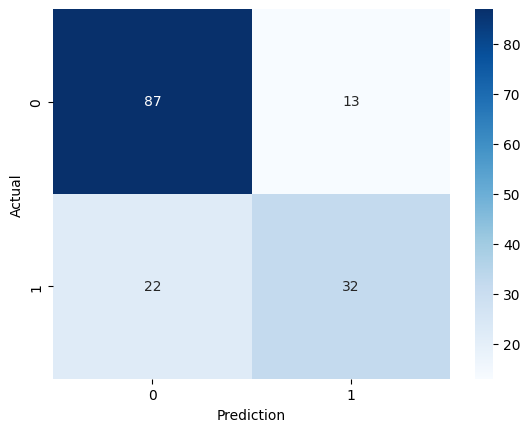

In [29]:
from sklearn.metrics import confusion_matrix
def show_cfm(Y_test, Y_pred):
  cfm= confusion_matrix(Y_test, Y_pred)
  s=sns.heatmap(cfm, annot=True,cmap="Blues",fmt='d')          # fmt='d'는 십진수로 해달라는 말
  s.set(xlabel= 'Prediction',ylabel="Actual")
show_cfm(Y_test, Y_pred)

##7.튜닝

In [30]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "C":[1,2,3],
    'kernel':['linear','poly','rbf'],
    'gamma':[0.1,0.5,1]
}

In [31]:

clf = SVC()
gs = GridSearchCV(clf, grid_params, cv=5,verbose=5)
gs.fit(X_train_s, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.780 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.707 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.772 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.795 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.699 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.748 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.764 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.689 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'gamma': [0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=5)

In [32]:
#가장 좋은 파라메터 조합
gs.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [33]:
#가장 좋은 조합의 정확도
gs.best_score_

0.7622684259629482

##8.최종모델 학습

In [34]:
#최종베스트 모델
clf = SVC(C=1,gamma=0.1,kernel='linear')
clf.fit(X_train_s,Y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [35]:
Y_pred = clf.predict(X_test_s)

In [36]:
print_metrics(Y_test,Y_pred)

정확도: 0.7597402597402597
재현율: 0.5370370370370371
정밀도: 0.7073170731707317
f1스코어: 0.6105263157894738


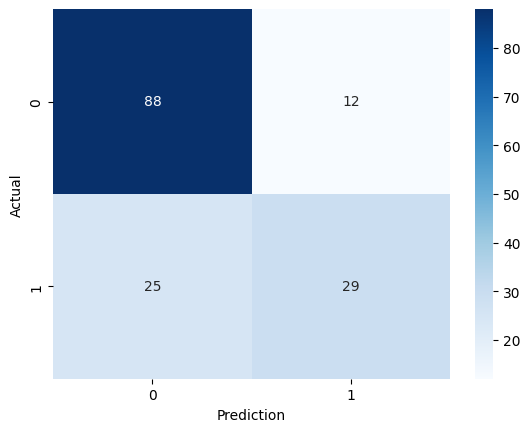

In [37]:
show_cfm(Y_test,Y_pred)

##KNN 모델 학습

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# 1.객체 만들기
# 2. 학습 fit()
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s,Y_train)

KNeighborsClassifier()

In [39]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)

In [40]:
X_test_s=ss.transform(X_test)
Y_test= le.transform(Y_test)

In [41]:
from sklearn.metrics import accuracy_score,recall_score, precision_score             # metrics 안에 평가하는 함수들이 많이 있음

Y_pred =clf.predict(X_test_s)   # 예측값

#평가
acc= accuracy_score(Y_test,Y_pred)
re= recall_score(Y_test,Y_pred)
pr= precision_score(Y_test,Y_pred)
print('정확도:',acc)
print('재현율:',re)
print('정밀도:',pr)

정확도: 0.7532467532467533
재현율: 0.5555555555555556
정밀도: 0.6818181818181818


In [42]:
values=[]

for k in range(1,20):
  clf= KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train_s, Y_train)
  acc=clf.score(X_test_s,Y_test)
  values.append(acc)

In [43]:
values

[0.6948051948051948,
 0.7077922077922078,
 0.7532467532467533,
 0.7337662337662337,
 0.7532467532467533,
 0.7727272727272727,
 0.7532467532467533,
 0.7532467532467533,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7597402597402597,
 0.7597402597402597,
 0.7662337662337663,
 0.7662337662337663,
 0.7597402597402597,
 0.7532467532467533,
 0.7467532467532467,
 0.7402597402597403]

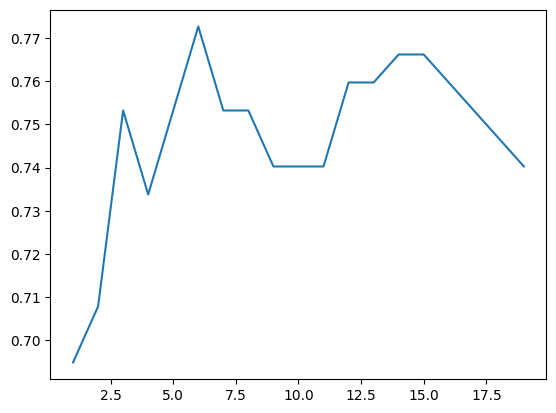

In [44]:
plt.plot(np.arange(1,20),values)
plt.show()

In [45]:
clf= KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train_s, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [46]:
acc = clf.score(X_test_s,Y_test)

In [47]:
acc

0.7727272727272727